In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
low_dpi_img = cv2.cvtColor(cv2.imread('./low_dpi.png'), cv2.COLOR_BGR2RGB)

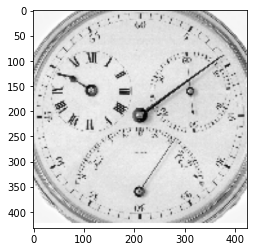

In [9]:
low_dpi_img_1d = low_dpi_img[:, :, 0]

plt.imshow(low_dpi_img_1d, cmap='gray')

In [10]:
filtr = 1/9*np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
])

In [13]:
filtr.shape

(3, 3)

In [12]:
low_dpi_img_1d.shape

(432, 424)

In [4]:
from scipy.signal import convolve2d

In [22]:
smoothed_low_dpi.shape

(434, 426)

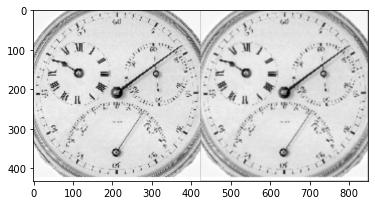

In [23]:
smoothed_low_dpi = convolve2d(low_dpi_img_1d, filtr, mode='same')

plt.imshow(np.hstack((low_dpi_img_1d, smoothed_low_dpi)), cmap='gray')

In [25]:
many_things_img = cv2.cvtColor(cv2.imread('./many_things.png'), cv2.COLOR_BGR2GRAY)

In [43]:
many_things_img_fix = cv2.resize(many_things_img, (355, 355))

In [26]:
many_things_img.shape

(357, 355)

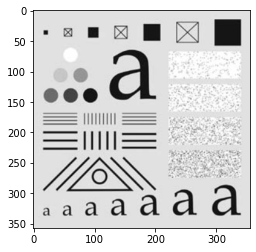

In [29]:
plt.imshow(many_things_img, cmap='gray')

In [32]:
np.sum(np.ones((3, 3)))

9.0

In [39]:
def generate_box_filter(d):
    filtr = np.ones((d, d))
    
    return 1/np.sum(filtr) * filtr

In [44]:
filtr_2 = generate_box_filter(5)

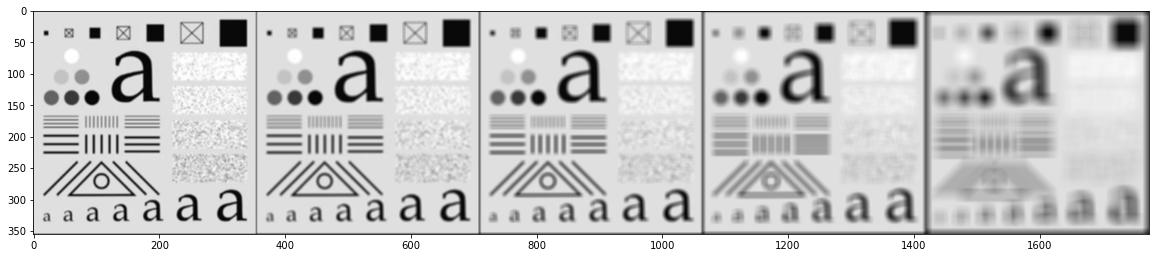

In [83]:
conv_3 = convolve2d(many_things_img_fix, generate_box_filter(3), mode='same')
conv_5 = convolve2d(many_things_img_fix, generate_box_filter(5), mode='same')
conv_7 = convolve2d(many_things_img_fix, generate_box_filter(7), mode='same')
conv_11 = convolve2d(many_things_img_fix, generate_box_filter(11), mode='same')
conv_21 = convolve2d(many_things_img_fix, generate_box_filter(21), mode='same')

plt.figure(figsize=(20, 5))
plt.imshow(np.hstack((conv_3, conv_5, conv_7, conv_11, conv_21)), cmap='gray')

In [53]:
from scipy import stats

In [54]:
stats.norm(loc=0, scale=1).rvs(10)

array([-0.46768799,  0.30041295, -0.7538165 ,  0.76599401, -1.10155543,
        1.78829076,  0.36610045, -1.05293445,  0.70987445,  0.05649625])

In [9]:
def generate_gaussian_filter(d, std=1):
    ax = np.linspace(-(d - 1) / 2., (d - 1) / 2., d)
    gauss = np.exp(-0.5 * np.square(ax) / std**2)
    kernel = np.outer(gauss, gauss)
    
    return kernel / np.sum(kernel)

In [80]:
g_filtr = generate_gaussian_filter(3)
g_filtr

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

(array([1492.,  108.,   64.,   40.,   36.,   28.,   24.,   20.,   16.,
          21.]),
 array([1.38976006e-10, 6.36640954e-04, 1.27328177e-03, 1.90992258e-03,
        2.54656340e-03, 3.18320421e-03, 3.81984503e-03, 4.45648584e-03,
        5.09312666e-03, 5.72976747e-03, 6.36640829e-03]),
 <BarContainer object of 10 artists>)

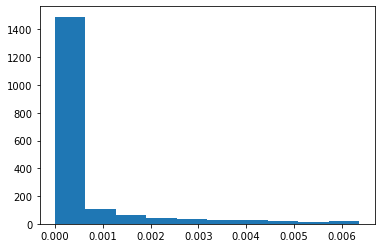

In [117]:
plt.hist(generate_gaussian_filter(43, std=5).ravel())

In [96]:
generate_gaussian_filter(3, std=1)

array([[0.36787944, 0.60653066, 0.36787944],
       [0.60653066, 1.        , 0.60653066],
       [0.36787944, 0.60653066, 0.36787944]])

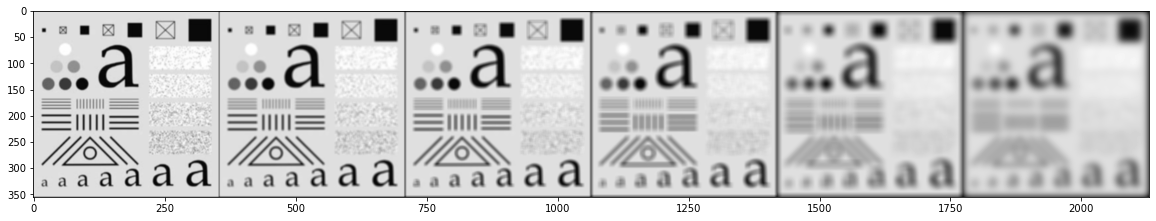

In [110]:
std = 7

g_conv_3 = convolve2d(many_things_img_fix, generate_gaussian_filter(3, std=std), mode='same')
g_conv_5 = convolve2d(many_things_img_fix, generate_gaussian_filter(5, std=std), mode='same')
g_conv_7 = convolve2d(many_things_img_fix, generate_gaussian_filter(7, std=std), mode='same')
g_conv_11 = convolve2d(many_things_img_fix, generate_gaussian_filter(11, std=std), mode='same')
g_conv_21 = convolve2d(many_things_img_fix, generate_gaussian_filter(21, std=std), mode='same')
g_conv_43 = convolve2d(many_things_img_fix, generate_gaussian_filter(43, std=std), mode='same')

plt.figure(figsize=(20, 5))
plt.imshow(np.hstack((g_conv_3, g_conv_5, g_conv_7, g_conv_11, g_conv_21, g_conv_43)), cmap='gray')

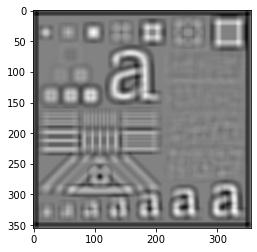

In [112]:
plt.imshow(conv_21 - g_conv_21, cmap='gray')

In [6]:
shaded_cb_img = cv2.cvtColor(cv2.imread('./shaded_chb.png'), cv2.COLOR_BGR2GRAY)

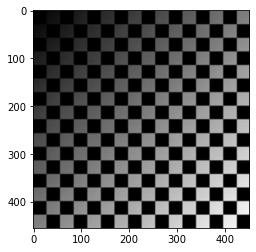

In [7]:
plt.imshow(shaded_cb_img, cmap='gray')


In [ ]:
plt.imshow(convolve2d(shaded_cb_img, generate_gaussian_filter(512, 128)), cmap='gray')

In [3]:
salt_pepper_img = cv2.cvtColor(cv2.imread('./noise_salt_and_pepper.png'), cv2.COLOR_BGR2GRAY)

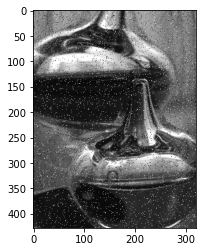

In [6]:
plt.imshow(salt_pepper_img, cmap='gray')

In [7]:
from scipy.ndimage import median_filter

plt.figure(figsize=(20, 10))
plt.imshow(np.hstack((salt_pepper_img, median_filter(salt_pepper_img, 3))), cmap='gray');